In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from numpy import random
from scipy import stats

(0.0022624802530464695, 0.14618762562731338)

In [17]:
help(kde)

Help on gaussian_kde in module scipy.stats.kde object:

class gaussian_kde(builtins.object)
 |  Representation of a kernel-density estimate using Gaussian kernels.
 |  
 |  Kernel density estimation is a way to estimate the probability density
 |  function (PDF) of a random variable in a non-parametric way.
 |  `gaussian_kde` works for both uni-variate and multi-variate data.   It
 |  includes automatic bandwidth determination.  The estimation works best for
 |  a unimodal distribution; bimodal or multi-modal distributions tend to be
 |  oversmoothed.
 |  
 |  Parameters
 |  ----------
 |  dataset : array_like
 |      Datapoints to estimate from. In case of univariate data this is a 1-D
 |      array, otherwise a 2-D array with shape (# of dims, # of data).
 |  bw_method : str, scalar or callable, optional
 |      The method used to calculate the estimator bandwidth.  This can be
 |      'scott', 'silverman', a scalar constant or a callable.  If a scalar,
 |      this will be used dire

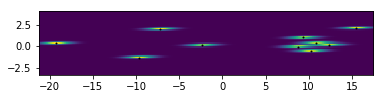

In [190]:
def measure(n):

    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)*10
    m2 = np.random.normal(size=n)
    return m1, m2

m1, m2 = measure(10)
ymax = m2.max()+2
xmin = m1.min()-2
xmax = m1.max()+2
ymin = m2.min()-2

def Get_DensityMap(m1,m2, patch=2):
    ymax = m2.max()+patch
    xmin = m1.min()-patch
    xmax = m1.max()+patch
    ymin = m2.min()-patch
    X, Y = np.mgrid[xmin:xmax:500j, ymin:ymax:50j]
    positions = np.vstack([X.flatten(), Y.flatten()])
    values = np.vstack([m1, m2])
    kernel = stats.kde.gaussian_kde(values,0.1)
    return np.rot90(np.reshape(kernel(positions).T, X.shape)), [xmin, xmax, ymin, ymax]

Z , ext = Get_DensityMap(m1,m2)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(Z,
          extent=ext)
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

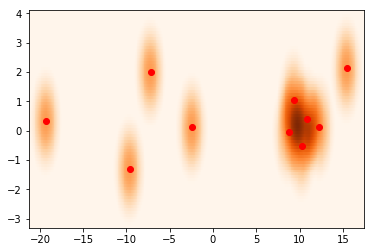

In [219]:
import matplotlib.pyplot as plt
import numpy as np
import math
#POINT DATASET
x=m1
y=m2

#DEFINE GRID SIZE AND RADIUS(h)
grid_size=0.1
h=2
def Quad_densityMap(x,y,h=0.5, grid_size=1):
    import math

    #GETTING X,Y MIN AND MAX
    x_min=min(x)
    x_max=max(x)
    y_min=min(y)
    y_max=max(y)

    #CONSTRUCT GRID
    x_grid=np.arange(x_min-h,x_max+h,grid_size)
    y_grid=np.arange(y_min-h,y_max+h,grid_size)
    x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

    #GRID CENTER POINT
    xc=x_mesh+(grid_size/2)
    yc=y_mesh+(grid_size/2)

    #FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
    def kde_quartic(d,h):
        dn=d/h
        P=(15/16)*(1-dn**2)**2
        return P

    #PROCESSING
    intensity_list=[]
    for j in range(len(xc)):
        intensity_row=[]
        for k in range(len(xc[0])):
            kde_value_list=[]
            for i in range(len(x)):
                #CALCULATE DISTANCE
                d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
                if d<=h:
                    p=kde_quartic(d,h)
                else:
                    p=0
                kde_value_list.append(p)
            #SUM ALL INTENSITY VALUE
            p_total=sum(kde_value_list)
            intensity_row.append(p_total)
        intensity_list.append(intensity_row)

    #HEATMAP OUTPUT    
    intensity=np.array(intensity_list)
    return x_mesh,y_mesh,intensity
x_mesh,y_mesh,intensity = Quad_densityMap(x,y,h=2, grid_size=0.1)
plt.pcolormesh(x_mesh,y_mesh,intensity,cmap='Oranges')
plt.plot(x,y,'ro')
plt.axis()
plt.show()

In [202]:
x_mesh.shape

(24, 55)

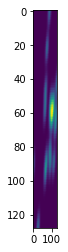

In [170]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

# Create some dummy data
rvs = np.append(np.random.normal(size=(20,1))*5,
                np.random.normal(size=(20,1)),
                axis=1)

kde = stats.kde.gaussian_kde(rvs.T,0.2)

# Regular grid to evaluate kde upon
x_flat = np.r_[rvs[:,0].min():rvs[:,0].max():128j]
y_flat = np.r_[rvs[:,1].min():rvs[:,1].max():128j]
x,y = np.meshgrid(x_flat,y_flat)
grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)

z = kde(grid_coords.T)
z = z.reshape(128,128)

plt.imshow(z,aspect=x_flat.ptp()/y_flat.ptp())
plt.show()

In [58]:
n = 600
xx = np.random.randn(n)
yy = (1 * xx) + np.random.randn(n)
kde = stats.gaussian_kde(np.vstack([xx,yy]))
zz = kde(np.vstack([xx,yy]))
zz.min(),zz.max()

(0.0023862402437036597, 0.14743270161822961)

In [63]:
np.vstack([xx,yy]).shape

(2, 600)

In [60]:
cc = cm.get_cmap('jet')((zz-zz.min())/(zz.max()-zz.min()))
cc.min(),cc.max()

(0.0, 1.0)

In [61]:
np.mgrid[xmin:xmax:500j].shape

(500,)

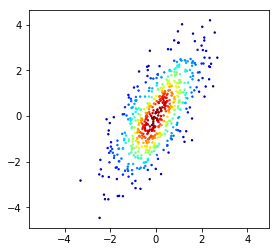

In [62]:
fig = plt.figure(figsize=(4.3,4))
ax = plt.subplot(1,1,1)
ax.scatter(xx,yy,facecolors=cc, s=2)
ax.set_aspect('equal','datalim')
plt.savefig('scatter_gaussian_kde.png', bbox_inches='tight', pad_inches=0.02, dpi=200)



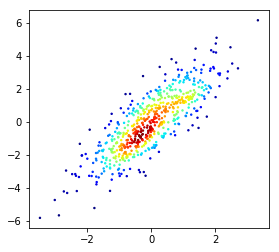

In [8]:
fig = plt.figure(figsize=(4.3,4))
ax = plt.subplot(1,1,1)
def ScatterDensity(ax, xx, yy, CmapName='jet', Si=2, edgecolor=None):
    from scipy.stats import gaussian_kde
    kde = stats.gaussian_kde([xx,yy])
    zz = kde([xx,yy])
    zz.min(),zz.max()
    cc = cm.get_cmap(CmapName)((zz-zz.min())/(zz.max()-zz.min()))
    ax.scatter(xx,yy,facecolors=cc, s=Si, edgecolor=None)
ScatterDensity(ax, xx, yy, CmapName='jet', Si=2, edgecolor=None)

In [47]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

ModuleNotFoundError: No module named 'cartopy'